In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('analysts_survey_1.1.csv')
pd.set_option('display.max_rows', None)

df.columns

Index(['analyst_id', 'gender', 'age', 'data_analyzing', 'analyst_type',
       'data_science', 'living_area', 'office_area', 'job_percentage',
       'sallary', 'min_sallary Range', 'max_sallary Range', 'avg_sallary',
       'equity', 'experience_years', 'manager', 'school_degree',
       'course_taken', 'course_name', 'visualization_tool', 'using_sql',
       'required_statistic_knowledge', 'predictive_models',
       'wages_decrease_covid19', 'fired_covid19', 'company', 'startup_size'],
      dtype='object')

In [2]:
df.describe() #starting with 298 answers

,analyst_id,age,min_sallary Range,max_sallary Range,avg_sallary,experience_years
count,298.000000,298.000000,262.000000,262.000000,260.000000,290.000000
mean,149.500000,32.127517,18.320611,20.664122,19.503846,4.231034
std,86.169407,6.012656,7.308492,7.291533,7.182937,3.718243
min,1.000000,19.000000,0.000000,5.000000,3.000000,0.000000
25%,75.250000,28.000000,13.000000,15.000000,14.000000,2.000000
50%,149.500000,31.000000,16.500000,19.000000,17.000000,3.000000
75%,223.750000,35.000000,23.000000,25.000000,20.250000,5.000000
max,298.000000,62.000000,40.000000,40.000000,40.000000,21.000000


In [3]:
#cleaning 

#drop 
df.dropna(axis=0, how="any", thresh=None, subset=['avg_sallary'], inplace=True)
df['avg_sallary'].isna().sum()

#select relvant values
df = df[df['job_percentage'] == 'Full-time']
df['job_percentage'].isna().sum()

df = df[df['data_analyzing'] == 'Yes']
df['data_analyzing'].isna().sum()

df.drop(df[df['company'] == 'IDF'].index, inplace=True)

# drop the 1 na so i can use this field in the regression model
df.dropna(axis=0, how="any", thresh=None, subset=['course_taken'], inplace=True)
df['course_taken'].isna().sum()

df.dropna(axis=0, how="any", thresh=None, subset=['equity'], inplace=True)
df['equity'].isna().sum()

0

In [4]:
df.describe()  # 230 remained results

,analyst_id,age,min_sallary Range,max_sallary Range,avg_sallary,experience_years
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,151.843478,32.443478,18.952174,21.282609,20.291304,4.426087
std,87.923209,4.904665,6.821003,6.983021,7.007009,3.682985
min,1.000000,22.000000,13.000000,15.000000,14.000000,0.000000
25%,76.250000,29.000000,13.000000,15.000000,14.000000,2.000000
50%,152.500000,31.500000,18.000000,20.000000,19.000000,3.000000
75%,227.750000,35.000000,23.000000,25.000000,24.000000,6.000000
max,298.000000,49.000000,40.000000,40.000000,40.000000,21.000000


In [5]:
#checks

#df

#check nones
#df.isna().any()

#df['equity'].isna().sum()
#df.columns[df.isna().any()].tolist()


# check if all is 1/yes
#data_analyzing 
df[['data_analyzing']].describe()

# check all is full time
#'job_percentage'
df[['job_percentage']].describe()

df[['gender']].describe()

df[['course_taken']].describe()
df['course_taken'].isna().sum()

0

In [6]:
# cleaning but anyway - wont be in the model since all values are the same : Yes 
df['data_analyzing'].replace(['Yes'], [1], inplace=True)

In [7]:
df.describe() #count 230 

,analyst_id,age,data_analyzing,min_sallary Range,max_sallary Range,avg_sallary,experience_years
count,230.000000,230.000000,230.0,230.000000,230.000000,230.000000,230.000000
mean,151.843478,32.443478,1.0,18.952174,21.282609,20.291304,4.426087
std,87.923209,4.904665,0.0,6.821003,6.983021,7.007009,3.682985
min,1.000000,22.000000,1.0,13.000000,15.000000,14.000000,0.000000
25%,76.250000,29.000000,1.0,13.000000,15.000000,14.000000,2.000000
50%,152.500000,31.500000,1.0,18.000000,20.000000,19.000000,3.000000
75%,227.750000,35.000000,1.0,23.000000,25.000000,24.000000,6.000000
max,298.000000,49.000000,1.0,40.000000,40.000000,40.000000,21.000000


In [8]:
df["gender"].describe()

count      230
unique       2
top       Male
freq       150
Name: gender, dtype: object

In [9]:
# only data analysts (droping the 12 data scientists)
# df without data scientists 
df_analysts = df[df['data_science'] == 'No']
df_analysts.describe() #218

,analyst_id,age,data_analyzing,min_sallary Range,max_sallary Range,avg_sallary,experience_years
count,218.000000,218.000000,218.0,218.000000,218.00000,218.000000,218.000000
mean,150.857798,32.334862,1.0,18.522936,20.83945,19.844037,4.302752
std,88.035618,4.828179,0.0,6.457370,6.63234,6.645985,3.519543
min,1.000000,22.000000,1.0,13.000000,15.00000,14.000000,0.000000
25%,76.250000,29.000000,1.0,13.000000,15.00000,14.000000,2.000000
50%,151.000000,31.000000,1.0,18.000000,20.00000,19.000000,3.000000
75%,227.750000,35.000000,1.0,23.000000,25.00000,24.000000,5.000000
max,298.000000,49.000000,1.0,40.000000,40.00000,40.000000,20.000000


In [10]:
# salary <= 30
df_analysts_salary = df_analysts[df_analysts['avg_sallary'] <= 30]
df_analysts_salary.describe() #194 analysts have salary <=30
df_analysts_salary["avg_sallary"]

0      17.0
2      24.0
3      17.0
4      14.0
5      17.0
6      19.0
7      19.0
8      17.0
9      19.0
11     19.0
12     19.0
14     19.0
15     19.0
16     24.0
17     19.0
19     14.0
22     14.0
26     24.0
27     27.0
28     14.0
29     14.0
30     27.0
31     14.0
32     14.0
35     17.0
39     17.0
42     14.0
43     17.0
45     19.0
46     17.0
47     19.0
51     19.0
52     14.0
54     14.0
55     19.0
57     24.0
58     19.0
59     17.0
60     19.0
63     24.0
64     17.0
65     14.0
68     14.0
71     17.0
74     19.0
75     14.0
76     19.0
77     19.0
79     24.0
80     14.0
81     14.0
82     17.0
85     17.0
86     17.0
87     27.0
89     14.0
90     19.0
91     14.0
92     14.0
93     14.0
94     17.0
96     14.0
97     27.0
100    19.0
101    14.0
103    19.0
107    19.0
108    14.0
109    24.0
110    19.0
113    14.0
116    19.0
117    19.0
119    14.0
120    19.0
121    27.0
124    17.0
125    14.0
126    19.0
127    17.0
129    14.0
130    14.0
133    27.0
135 

In [11]:
df_analysts["gender"].describe()

count      218
unique       2
top       Male
freq       143
Name: gender, dtype: object

In [12]:
#Adjusting data - changing text values to numbers
df['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['data_science'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['using_sql'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['predictive_models'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['wages_decrease_covid19'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['fired_covid19'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['equity'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['manager'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['course_taken'].replace(['No', 'Yes'], [0, 1], inplace=True)

#required_statistic_knowledge
df['required_statistic_knowledge'].replace(['No', 'Little', 'Medium', 'High'], [0, 1, 2, 3], inplace=True)

In [13]:
# checks
df.dtypes
#check sum of nulls per column
df.isnull().sum()

analyst_id                        0
gender                            0
age                               0
data_analyzing                    0
analyst_type                      0
data_science                      0
living_area                       0
office_area                       0
job_percentage                    0
sallary                           0
min_sallary Range                 0
max_sallary Range                 0
avg_sallary                       0
equity                            0
experience_years                  0
manager                           0
school_degree                    11
course_taken                      0
course_name                     178
visualization_tool                1
using_sql                         0
required_statistic_knowledge      0
predictive_models                 0
wages_decrease_covid19            0
fired_covid19                     0
company                           2
startup_size                    143
dtype: int64

In [14]:
# #convert objects to float
# df['data_science'].astype(str).astype(float)
# df['data_science'].dtypes

<AxesSubplot:>

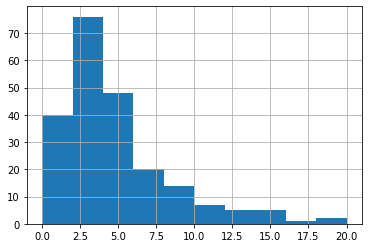

In [15]:
df_analysts["experience_years"].hist()

In [16]:
#df['experience_years'].mean() # 4.42
#df['experience_years'].median() # 3
#df['avg_sallary'].mean() # 20.3
#df['avg_sallary'].median() #19

In [17]:
#df_analysts['experience_years'].mean() # 4.3
#df_analysts['experience_years'].median() # 3

In [18]:
#df_analysts['avg_sallary'].mean() #19,840
#df_analysts['avg_sallary'].median() #19,000

In [19]:
# analysts - experience years 
df_analysts["avg_sallary"].groupby(pd.cut(df_analysts["experience_years"], [0,1,3,6,20])).aggregate([np.average, np.median, min, max, np.std, np.count_nonzero])

,average,median,min,max,std,count_nonzero
experience_years,,,,,,
"(0, 1]",15.131579,14.0,14.0,19.0,1.876902,38.0
"(1, 3]",17.644737,17.0,14.0,37.0,4.002346,76.0
"(3, 6]",22.140625,19.0,14.0,37.0,6.937058,64.0
"(6, 20]",25.394737,24.0,14.0,40.0,8.109186,38.0


In [33]:
# by gender
df_analysts["avg_sallary"].groupby([df_analysts["gender"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])


,average,median,max,std,count_nonzero
gender,,,,,
Female,20.63,19.00,37.00,6.73,75.00
Male,19.43,17.00,40.00,6.59,143.00


In [21]:
#df female analysts 
df_analysts_female = df_analysts[df_analysts['gender'] == 1]
#df_analysts_female['experience_years'].mean() # 4.76
#df_analysts_female['experience_years'].median() # 4
#df_analysts_female['avg_sallary'].mean() # 20.626
#df_analysts_female['avg_sallary'].median() #19

In [22]:
#df male analysts 
df_analysts_male = df_analysts[df_analysts['gender'] == 0]
#df_analysts_male['experience_years'].mean() # 4.06
#df_analysts_male['experience_years'].median() # 3
#df_analysts_male['avg_sallary'].mean() # 19,433
#df_analysts_male['avg_sallary'].median() #17

In [30]:
df_analysts["avg_sallary"].groupby(pd.cut(df_analysts["experience_years"], [0,1,3,6,20])).aggregate([np.average, np.median, max, np.std, np.count_nonzero])


,average,median,max,std,count_nonzero
experience_years,,,,,
"(0, 1]",15.13,14.00,19.00,1.88,38.00
"(1, 3]",17.64,17.00,37.00,4.00,76.00
"(3, 6]",22.14,19.00,37.00,6.94,64.00
"(6, 20]",25.39,24.00,40.00,8.11,38.00


In [24]:
# by gender
#df_analysts_female["avg_sallary"].groupby(df_analysts_female["experience_years"]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

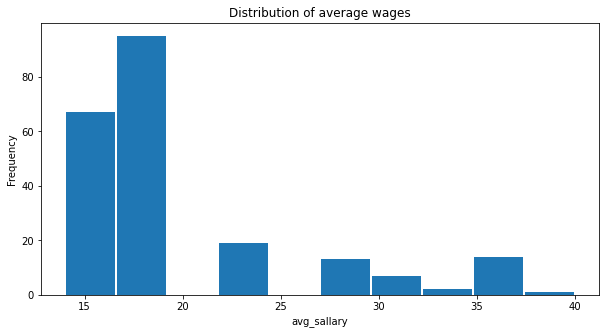

In [25]:
plt.figure(figsize= (10,5))
df_analysts.avg_sallary.plot(kind="hist", rwidth=0.95)
plt.xlabel('avg_sallary')
plt.title('Distribution of average wages')
plt.show()

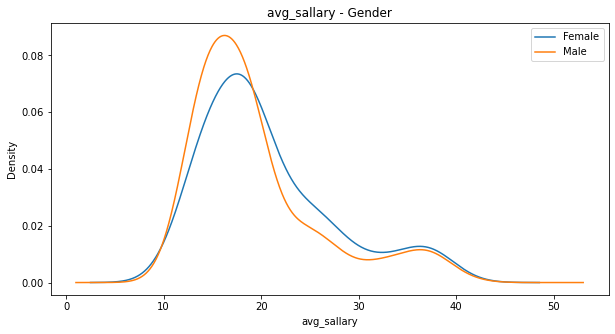

In [26]:
# analyst salary by gender 

df_analysts.groupby('gender')['avg_sallary'].plot(kind='kde', figsize=(10, 5))
plt.legend()
plt.title('avg_sallary - Gender')
plt.xlabel('avg_sallary')
plt.show()

ValueError: x and y must be the same size

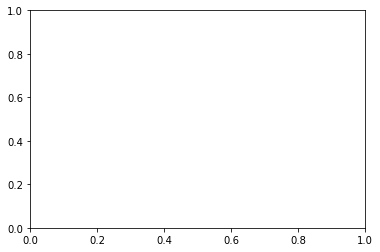

In [36]:
plt.scatter(df_analysts['experience_years'], df['avg_sallary'])
plt.title('avg_sallary - Experience')
plt.xlabel('Experience')
plt.show()

In [ ]:
import seaborn as sns

sns.scatterplot(df_analysts['experience_years'], df_analysts['avg_sallary'], alpha=0.5)

In [ ]:
# plot scatter plot
groups = df.groupby('gender')

fig, ax = plt.subplots()
for name, group in groups:
    print(name)
    ax.plot(group.experience_years, group.avg_sallary,marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(numpoints=1, loc='upper left')
ax.set_xlabel("Years of experience")
ax.set_ylabel("Salary")

for name, group in groups:
    group.plot.scatter(y='avg_sallary', x='experience_years', alpha=0.5) # plot scatter 
    plt.title(name)

In [34]:
df2 = df.groupby(pd.cut(df["experience_years"], [0,1,3,6,20])).mean()
df3 = df2[["experience_years", "avg_sallary",]]
print(df3,df3.describe())


                  experience_years  avg_sallary
experience_years                               
(0, 1]                        1.00        15.13
(1, 3]                        2.50        17.79
(3, 6]                        4.83        22.64
(6, 20]                      10.48        26.26        experience_years  avg_sallary
count              4.00         4.00
mean               4.70        20.45
std                4.16         4.96
min                1.00        15.13
25%                2.12        17.12
50%                3.67        20.21
75%                6.24        23.54
max               10.48        26.26


In [35]:
 print(df3.std())

experience_years   4.16
avg_sallary        4.96
dtype: float64


In [ ]:
plt.scatter(df2['experience_years'], df2['avg_sallary'])
plt.title('avg_sallary - Experience')
plt.xlabel('Experience')
plt.show()

In [ ]:
#
df1_1 = df[["experience_years", "avg_sallary"]]
df1_1

In [ ]:
#df1_1.groupby(pd.cut(df["experience_years"], [0,1,3,6,20])).mean()
#df1_1.groupby(pd.cut(df["experience_years"], [0,1,3,6,20])).aggregate([np.average, np.median, max, np.std, np.count_nonzero])
df1_1["avg_sallary"].groupby(pd.cut(df["experience_years"], [0,1,3,6,20])).aggregate([np.average, np.median, max, np.std, np.count_nonzero])


In [ ]:
# analysts by gender 
# creating a new df
df1_gender = df_analysts[["experience_years", "avg_sallary", "gender"]]
#df1_gender

In [ ]:
df1_gender["avg_sallary"].groupby([pd.cut(df1_gender["experience_years"], [0,1,3,6,20]),df1_gender["gender"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])


In [ ]:
#managers
df1_manager = df[["experience_years", "avg_sallary", "manager"]]
#df1_manager

In [ ]:
df1_manager["avg_sallary"].groupby([pd.cut(df1_manager["experience_years"], [0,1,3,6,20]),df1_manager["manager"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
# how many people each experience year included?
pd.cut(df["experience_years"], [0,1,3,6,20]).describe()
# top 1-3 years

In [ ]:
pd.cut(df["experience_years"], [0,1,3,6,20]).value_counts()

In [ ]:
# df without data scientists 
df_analysts = df[df['data_science'] == 0]
#df_analysts

#analyst type
df_analysts[['analyst_type']].value_counts()

In [ ]:
#analyst only - analyst type / avg salary
#df_analysts["avg_sallary"].groupby([df_analysts["analyst_type"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
#analyst only - analyst type / avg salary by experience years
#df_analysts["avg_sallary"].groupby([df_analysts["analyst_type"], pd.cut(df_analysts["experience_years"], [0,1,3,6,20])]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
# analysts avg salary / experience_years
df_analysts["avg_sallary"].groupby(df_analysts["experience_years"]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
#analysts - experience years / avg.salary by gender

df_analysts["avg_sallary"].groupby([df_analysts["gender"], df_analysts["experience_years"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
#analysts experience years / avg salary
df_analysts["avg_sallary"].groupby(df_analysts["experience_years"]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
#analysts experience years / avg salary

df_analysts["avg_sallary"].groupby([pd.cut(df_analysts["experience_years"], [0,1,3,6,20])]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
#analysts managers experience years / avg salary 

df_analysts["avg_sallary"].groupby([df_analysts["manager"], df_analysts["gender"], df_analysts["experience_years"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])